In [94]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [95]:
# Dicionário para representar as distâncias entre as cidades
distancias = {
    ('São Paulo', 'Rio de Janeiro'): 430,
    ('São Paulo', 'Belo Horizonte'): 586,
    ('São Paulo', 'Brasília'): 872,
    ('São Paulo', 'Salvador'): 1962,
    ('São Paulo', 'Curitiba'): 408,
    ('São Paulo', 'Porto Alegre'): 853,
    ('São Paulo', 'Fortaleza'): 2365,
    ('Rio de Janeiro', 'Belo Horizonte'): 434,
    ('Rio de Janeiro', 'Brasília'): 1148,
    ('Rio de Janeiro', 'Salvador'): 1649,
    ('Rio de Janeiro', 'Curitiba'): 852,
    ('Rio de Janeiro', 'Porto Alegre'): 1553,
    ('Rio de Janeiro', 'Fortaleza'): 2191,
    ('Rio de Janeiro', 'São Paulo'): 430,
    ('Belo Horizonte', 'Brasília'): 716,
    ('Belo Horizonte', 'Salvador'): 1372,
    ('Belo Horizonte', 'Curitiba'): 1004,
    ('Belo Horizonte', 'Porto Alegre'): 1698,
    ('Belo Horizonte', 'Fortaleza'): 2528,
    ('Belo Horizonte', 'São Paulo'): 586,
    ('Belo Horizonte', 'Rio de Janeiro'): 434,
    ('Brasília', 'Salvador'): 1446,
    ('Brasília', 'Curitiba'): 1366,
    ('Brasília', 'Porto Alegre'): 2027,
    ('Brasília', 'Fortaleza'): 2200,
    ('Brasília', 'Belo Horizonte'): 716,
    ('Brasília', 'São Paulo'): 872,
    ('Brasília', 'Rio de Janeiro'): 1148,
    ('Salvador', 'Curitiba'): 2387,
    ('Salvador', 'Porto Alegre'): 3090,
    ('Salvador', 'Fortaleza'): 1389,
    ('Salvador', 'São Paulo'): 1962,
    ('Salvador', 'Belo Horizonte'): 1372,
    ('Salvador', 'Rio de Janeiro'): 1649,
    ('Salvador', 'Brasília'): 1446,
    ('Curitiba', 'Porto Alegre'): 711,
    ('Curitiba', 'Fortaleza'): 3287,
    ('Curitiba', 'Salvador'): 2387,
    ('Curitiba', 'São Paulo'): 408,
    ('Curitiba', 'Belo Horizonte'): 1004,
    ('Curitiba', 'Rio de Janeiro'): 852,
    ('Curitiba', 'Brasília'): 1366,
    ('Porto Alegre', 'Fortaleza'): 4243,
    ('Porto Alegre', 'Rio de Janeiro'): 1553,
    ('Porto Alegre', 'Salvador'): 3090,
    ('Porto Alegre', 'São Paulo'): 853,
    ('Porto Alegre', 'Belo Horizonte'): 1698,
    ('Porto Alegre', 'Curitiba'): 711,
    ('Porto Alegre', 'Brasília'): 2027,
    ('Fortaleza', 'Salvador'): 1389,
    ('Fortaleza', 'Curitiba'): 3287,
    ('Fortaleza', 'Porto Alegre'): 4243,
    ('Fortaleza', 'São Paulo'): 2365,
    ('Fortaleza', 'Belo Horizonte'): 2528,
    ('Fortaleza', 'Rio de Janeiro'): 2191,
    ('Fortaleza', 'Brasília'): 2200,
}

# Lista de cidades
cidades = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Brasília',
           'Salvador', 'Curitiba', 'Porto Alegre', 'Fortaleza']

In [96]:
def gerar_rota_inicial(cidades):
    """
    Gera uma rota inicial aleatória a partir da lista de cidades.
    """
    rota = cidades.copy()
    random.shuffle(rota)
    return rota

def calcular_distancia_total(rota, distancias):
    """
    Calcula a distância total percorrida para uma dada rota.
    """
    distancia_total = 0
    for i in range(len(rota) - 1):
        # Adiciona a distância entre cada par de cidades consecutivas na rota
        distancia_total += distancias[(rota[i], rota[i+1])]
    # Adiciona a distância de volta à cidade inicial para fechar o ciclo
    distancia_total += distancias[(rota[-1], rota[0])]
    return distancia_total

def obter_vizinhos(rota):
    """
    Gera todas as possíveis "vizinhanças" da rota atual trocando duas cidades.
    """
    vizinhos = []
    for i in range(len(rota)):
        for j in range(i + 1, len(rota)):
            # Cria uma nova rota trocando duas cidades
            nova_rota = rota.copy()
            nova_rota[i], nova_rota[j] = nova_rota[j], nova_rota[i]
            vizinhos.append(nova_rota)
    return vizinhos

def hill_climbing(cidades, distancias, max_iter=1000):
    """
    Executa o algoritmo de hill climbing para encontrar uma solução para o problema do caixeiro viajante.

    Args:
        cidades: Lista de cidades.
        distancias: Dicionário com as distâncias entre as cidades.
        max_iter: Número máximo de iterações.

    Returns:
        A melhor rota encontrada e a distância total correspondente.
    """

    # Armazena as distâncias em cada iteração
    distancias_iteracao = []

    # Gera uma rota inicial aleatória
    rota_atual = gerar_rota_inicial(cidades)
    # Calcula o custo (distância total) da rota inicial
    custo_atual = calcular_distancia_total(rota_atual, distancias)
    distancias_iteracao.append(custo_atual)

    while True:
        # Gera todas as rotas vizinhas trocando duas cidades
        vizinhos = obter_vizinhos(rota_atual)
        nova_rota = None
        novo_custo = float('inf')  # Inicialize com um valor infinito

        # Encontra a melhor rota entre os vizinhos
        for vizinho in vizinhos:
            # Calcula o custo (distância total) da rota vizinha
            custo_vizinho = calcular_distancia_total(vizinho, distancias)
            if custo_vizinho < novo_custo:
                nova_rota = vizinho
                novo_custo = custo_vizinho

        if novo_custo >= custo_atual:
            # Se nenhuma rota melhor foi encontrada, retorne a rota atual
            break

        # Atualiza a rota atual e o custo atual se uma melhor foi encontrada
        rota_atual = nova_rota
        custo_atual = novo_custo
        distancias_iteracao.append(custo_atual)

    return rota_atual, distancias_iteracao


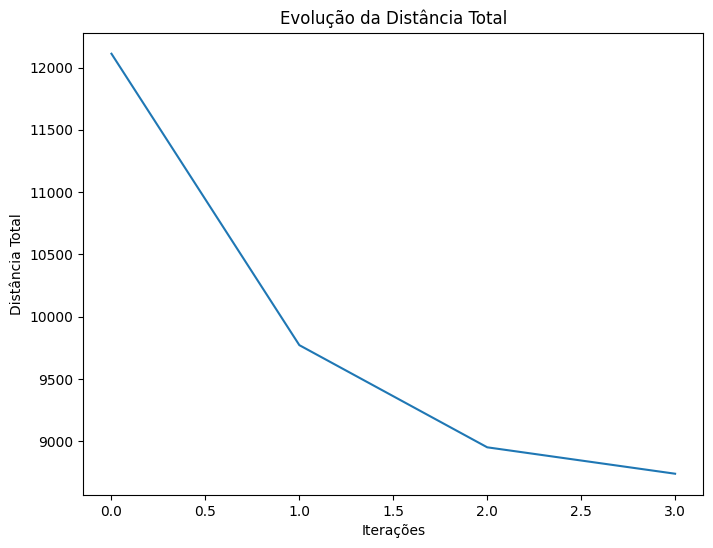

A melhor rota encontrada é: ['Salvador', 'Fortaleza', 'Rio de Janeiro', 'São Paulo', 'Porto Alegre', 'Curitiba', 'Belo Horizonte', 'Brasília'] com distância total de: 8740


In [97]:
# Executar o algoritmo
melhor_rota, distancias_iteracao = hill_climbing(cidades, distancias, max_iter=10000)
distancia = distancias_iteracao[-1]  # Pega a distância da última iteração

# Plotar as distâncias
plt.plot(distancias_iteracao)
plt.title("Evolução da Distância Total")
plt.xlabel("Iterações")
plt.ylabel("Distância Total")
plt.gcf().set_size_inches(8, 6)
plt.show()

print(f"A melhor rota encontrada é: {melhor_rota} com distância total de: {distancia}")